# Dataset: Daily Delhi Climate Dataset
# Author: Madalin Marian Porojan

# 1. Dataset Visualization

## Load

In [852]:
import pandas as pd

df_test = pd.read_csv("a01_datasets/DailyDelhiClimateTest.csv", parse_dates=["date"], index_col="date")
df_train = pd.read_csv("a01_datasets/DailyDelhiClimateTrain.csv", parse_dates=["date"], index_col="date")

## Correct Typing 

In [853]:
df_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [854]:
df_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [855]:
import numpy as np

df_train["meantemp"] = df_train["meantemp"].mask((df_train["meantemp"] >= 60), np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["wind_speed"] = df_train["wind_speed"].mask((df_train["wind_speed"] <= 0) | (df_train["wind_speed"] >= 486), np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["humidity"] = df_train["humidity"].mask(df_train["humidity"] >= 100, np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["meanpressure"] = df_train["meanpressure"].mask((df_train["meanpressure"] <= 870) | (df_train["meanpressure"] >= 1100), np.nan) # remove negative/zero pressure values. They don't make sense in this context

df_train = df_train.bfill().ffill()

## Plot Time Series Data

In [856]:
import matplotlib.pyplot as plt

def visualize_dataset(df):
    
    # Training data
    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Additive decomposition plots
    df_train["meantemp"][df_train.index.year == 2013].plot(ax=axes[0], linestyle='-', label="Mean Temperature", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df_train["humidity"][df_train.index.year == 2013].plot(ax=axes[1], linestyle='-', label="Humidity", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df_train["wind_speed"][df_train.index.year == 2013].plot(ax=axes[2], linestyle='-', label="Wind Speed", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df_train["meanpressure"][df_train.index.year == 2016].plot(ax=axes[3], linestyle='-', label="Mean Pressure", grid=True, legend=True, xlabel="Date", ylabel="Values")
    
    plt.show()

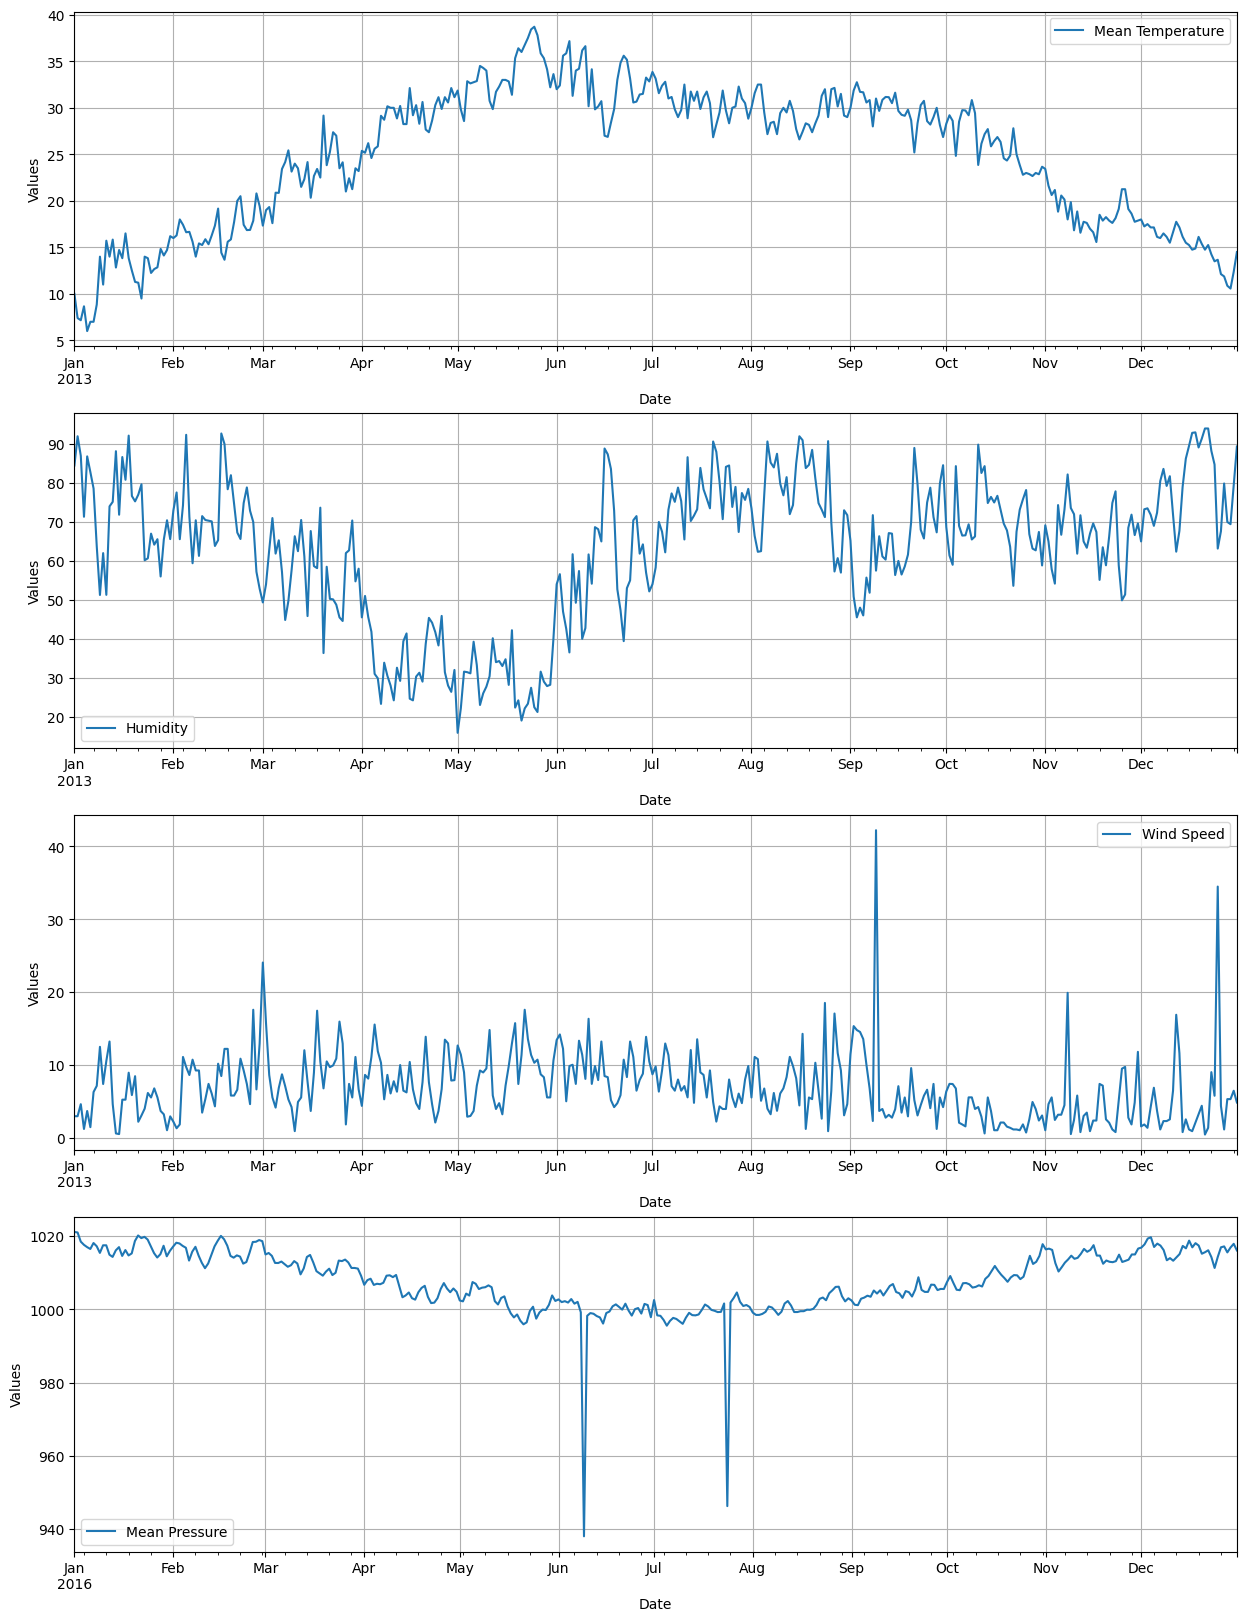

In [857]:
visualize_dataset(df_train)

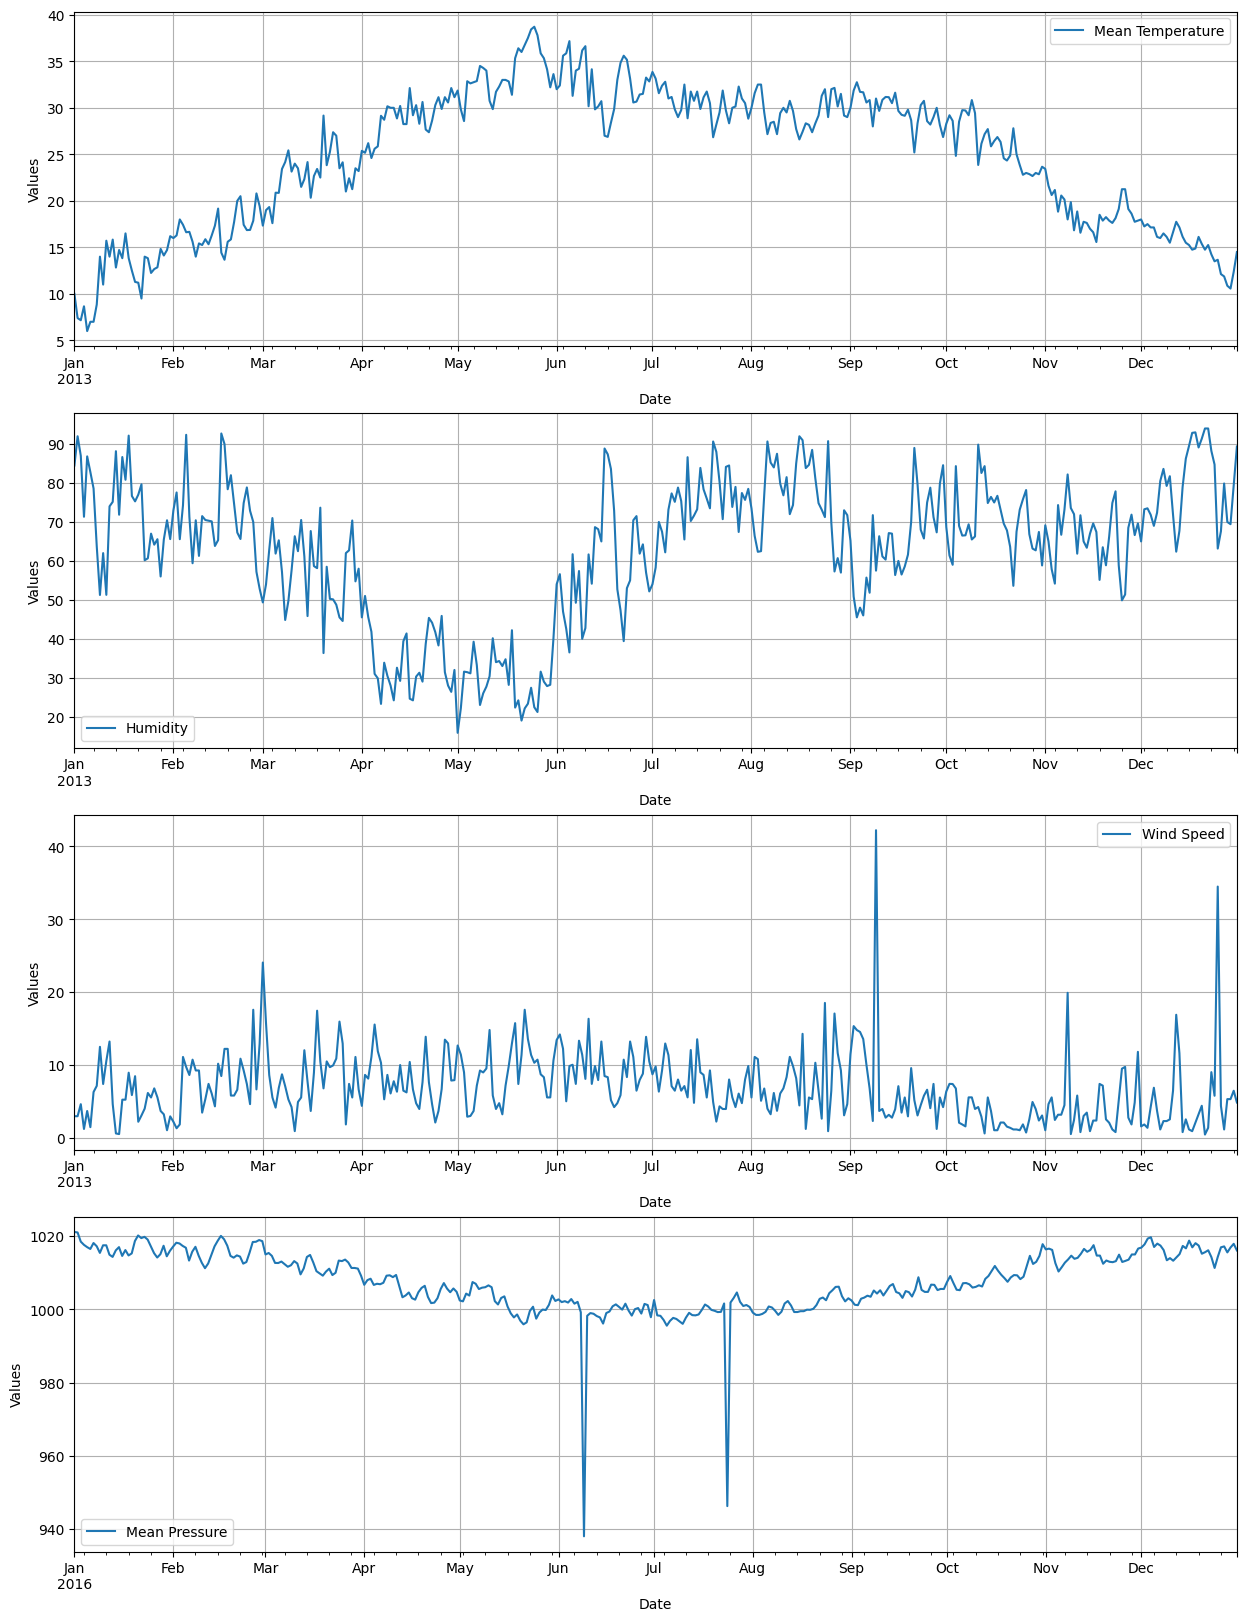

In [858]:
visualize_dataset(df_test)

# 2. Statistical Analysis

## Mean

In [859]:
df_train.mean()

meantemp          25.495521
humidity          60.762810
wind_speed         6.859648
meanpressure    1008.168505
dtype: float64

## Variance

In [860]:
df_train.var()

meantemp         53.994614
humidity        280.638724
wind_speed       20.343161
meanpressure     61.218046
dtype: float64

## Change over time of Mean and Variance 

In [861]:
yearly_stats = df_train['meantemp'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

           mean        var
date                      
2013  24.791494  54.896169
2014  25.010673  57.719487
2015  25.114591  52.385837
2016  27.103373  47.451002
2017  10.000000        NaN


In [862]:
yearly_stats = df_train['humidity'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

           mean         var
date                       
2013  63.046292  330.934231
2014  59.767942  263.117169
2015  61.430490  246.281105
2016  58.740174  272.655433
2017  87.000000         NaN


In [863]:
yearly_stats = df_train['wind_speed'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

          mean        var
date                     
2013  6.932006  22.523680
2014  6.818408  21.136125
2015  6.500295  21.909188
2016  7.185715  15.795749
2017  7.325000        NaN


In [864]:
yearly_stats = df_train['meanpressure'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

             mean        var
date                        
2013  1007.642172  60.141881
2014  1008.347166  58.416038
2015  1008.834821  55.166131
2016  1007.829333  70.755500
2017  1016.000000        NaN


In [865]:
def rolling_window(column: str):
    window_size = 30
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    df_train[column].rolling(window=window_size, min_periods=1).mean().plot(ax=ax[0])
    ax[0].set_title(f'{window_size}-Day Rolling Mean of {column}')
    df_train[column].rolling(window=window_size, min_periods=1).var().plot(ax=ax[1])
    ax[1].set_title(f'{window_size}-Day Rolling Variance of {column}')

    plt.tight_layout()
    plt.show()

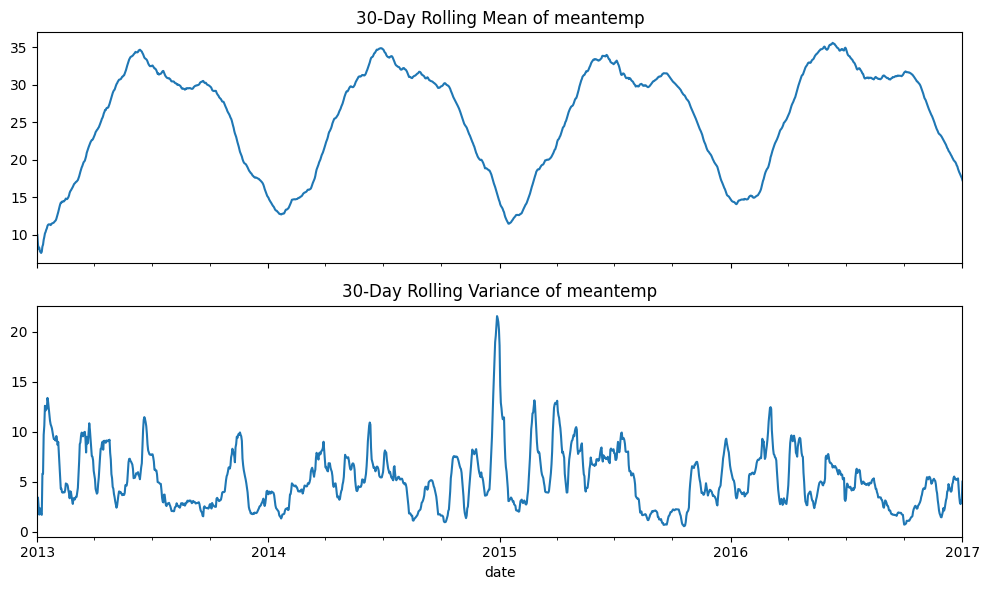

In [866]:
rolling_window("meantemp")

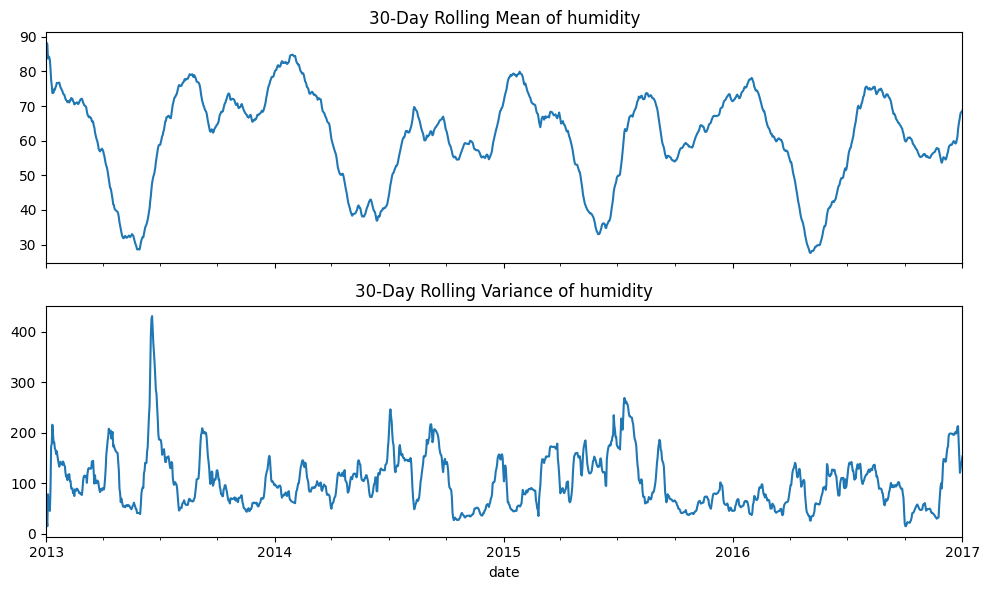

In [867]:
rolling_window("humidity")

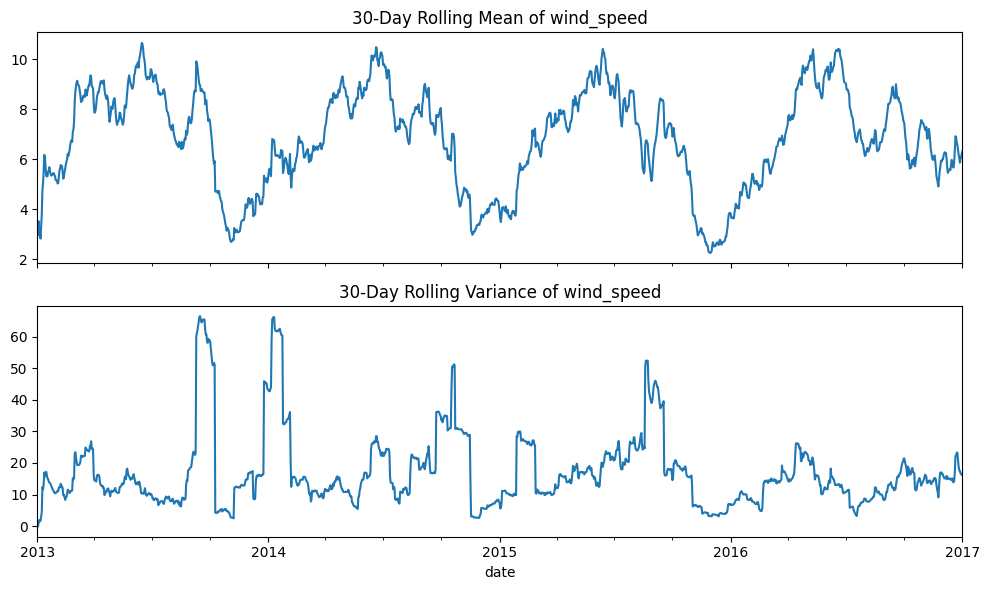

In [868]:
rolling_window("wind_speed")

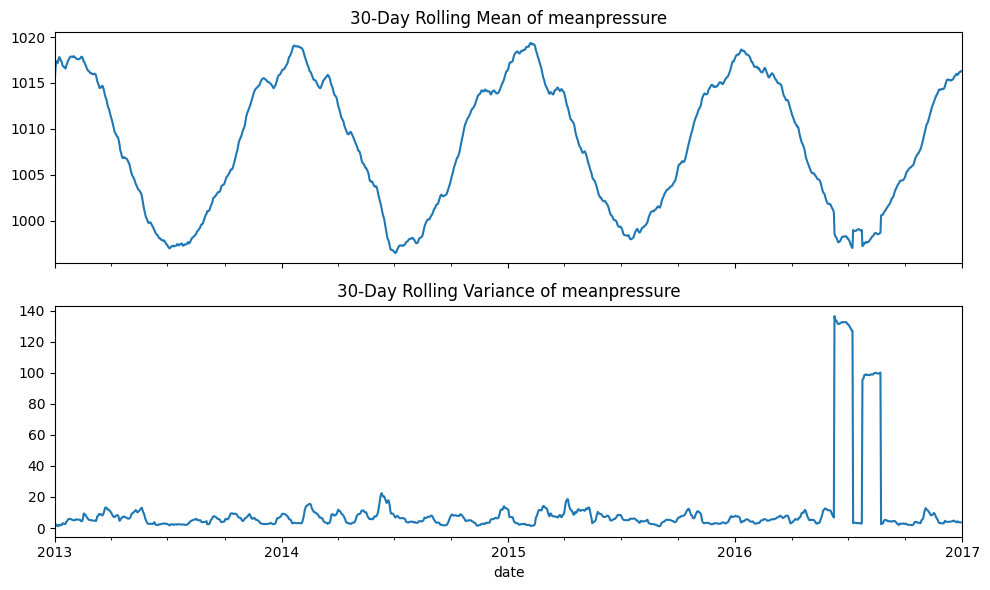

In [869]:
rolling_window("meanpressure")

### Based on all the graphs and data, the data set is non-stationary. The mean and variance are all over the place. Each year is different, indicating that the weather data has a natural randomness like in real life

## Augmented Dickey-Fuller test

In [870]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    """
    Perform ADF test and print results
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val

    print(out)
    print('---')


In [871]:
adf_test(df_train['meantemp'], title='meantemp')

Augmented Dickey-Fuller Test: meantemp
ADF Statistic             -2.021069
p-value                    0.277412
# Lags Used               10.000000
# Observations Used     1451.000000
Critical Value (1%)       -3.434865
Critical Value (5%)       -2.863534
Critical Value (10%)      -2.567832
dtype: float64
---


- Critical Values: Compared with ADF Statistic, the value is higher than all the critical values at 1, 5, and 10%, meaning the condition of having at least one less negative value than ADF Statistic value fails. 
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => has a unit root (non stationary)

In [872]:
adf_test(df_train['humidity'], title='humidity')

Augmented Dickey-Fuller Test: humidity
ADF Statistic             -3.717605
p-value                    0.003872
# Lags Used               15.000000
# Observations Used     1446.000000
Critical Value (1%)       -3.434880
Critical Value (5%)       -2.863541
Critical Value (10%)      -2.567835
dtype: float64
---


- Critical Values: Compared with ADF Statistic, the value is lower than all the critical values => stationary
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => does not have a unit root (stationary)

In [873]:
adf_test(df_train['wind_speed'], title='wind_speed')

Augmented Dickey-Fuller Test: wind_speed
ADF Statistic             -3.932039
p-value                    0.001811
# Lags Used               24.000000
# Observations Used     1437.000000
Critical Value (1%)       -3.434909
Critical Value (5%)       -2.863553
Critical Value (10%)      -2.567842
dtype: float64
---


- Critical Values: Compared with ADF Statistic, the value is lower than all the critical values => stationary
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => does not have a unit root (stationary)

In [874]:
adf_test(df_train['meanpressure'], title='meanpressure')

Augmented Dickey-Fuller Test: meanpressure
ADF Statistic             -2.248398
p-value                    0.189151
# Lags Used               11.000000
# Observations Used     1450.000000
Critical Value (1%)       -3.434868
Critical Value (5%)       -2.863535
Critical Value (10%)      -2.567832
dtype: float64
---


- Critical Values: Compared with ADF Statistic the test fails
- Fails to reject the null hypothesis ADF test (p-value <= 0.05) => has a unit root (non-stationary)

# 3. Correlation Testing

## Durbin-Watson test

- DW = 2 - no autocorrelation
- DW < 2 positive autocorrelation
- DW > 2 negative autocorrelation

In [875]:
from statsmodels.stats.stattools import durbin_watson

print(durbin_watson(df_train['meantemp']))

0.003963175920494487


Very strong autocorrelation

In [876]:
print(durbin_watson(df_train['humidity']))

0.017102149301537015


Very strong autocorrelation

In [877]:
print(durbin_watson(df_train['wind_speed']))

0.3423141821996743


Strong autocorrelation

In [878]:
print(durbin_watson(df_train['meanpressure']))

1.1764683086336135e-05


Very strong autocorrelation

The results indicate in other words that each day's value is highly dependent on the previous day's value.

## ACF and PACF Analysis

In [879]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def pacf(column: str):
    fig, ax = plt.subplots(2, 1,figsize=(10,7))
    plot_acf(df_train[column], ax=ax[0], lags=40, title=f'Autocorrelation Function (ACF) for {column}')
    plot_pacf(df_train[column], ax=ax[1], lags=40, method='ywm', title=f'Partial Autocorrelation Function (PACF) for {column}')
    plt.title(f'Partial Autocorrelation Function (PACF) for {column}')
    plt.show()

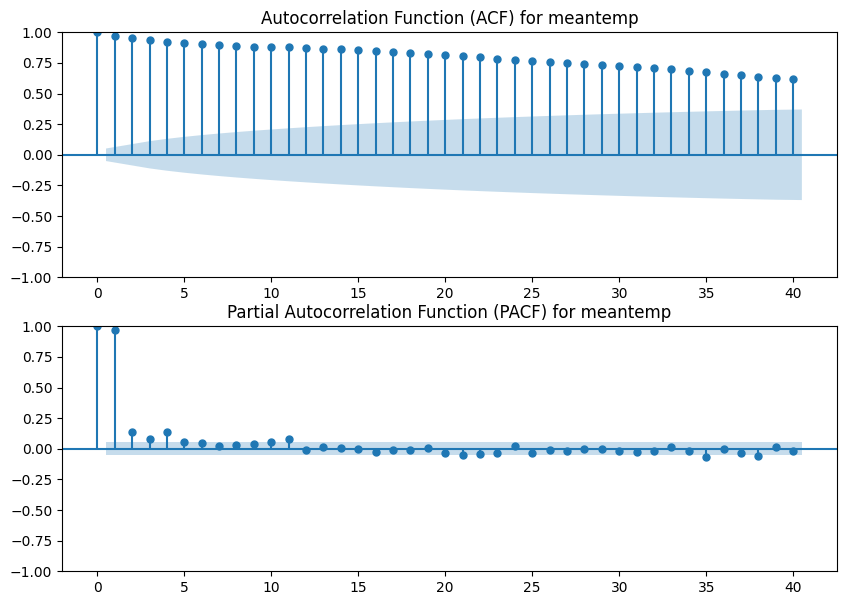

In [880]:
pacf('meantemp')

- ACF: Autocorrelation starts off high (lag 1) and remains positive for many lags before decaying. Suggests strong positive autocorrelation and non-stationarity
- PACF: Prominent spike at lag 1 => depends strongly on preceding value but subsequent lags are much smaller indicated a limited direct influence of further lags (lag 2 onwards). Consistent with **AR(1) regressive model**

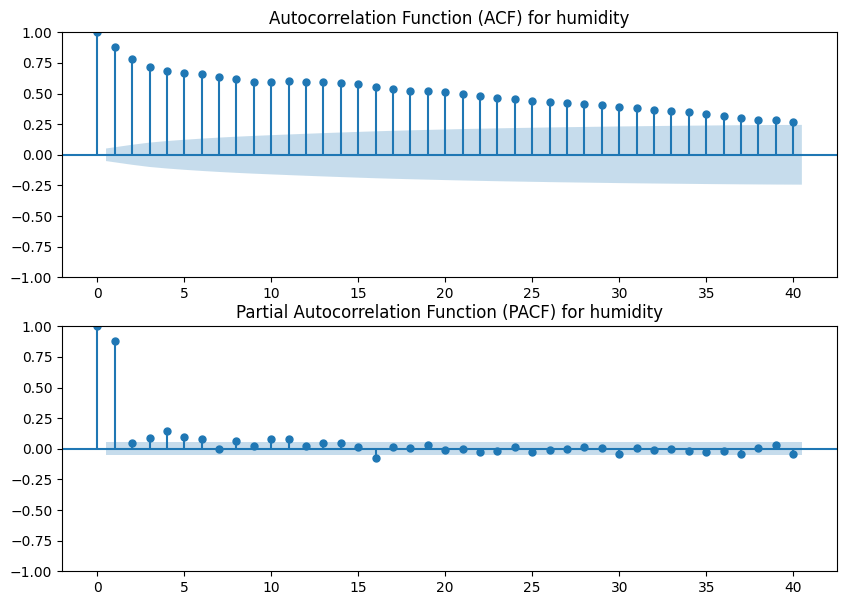

In [881]:
pacf('humidity')

- ACF: Autocorrelation starts off high (lag 1) and remains positive for many lags before decaying. Suggests strong positive autocorrelation and non-stationarity but based on ADF test that showed a low p-value, the series is likely stationary but exhibits significant short-term autocorrelation
- PACF: Prominent spike at lag 1 => depends strongly on preceding value but subsequent lags are much smaller indicated a limited direct influence of further lags (lag 2 onwards). Consistent with **SARIMA** model

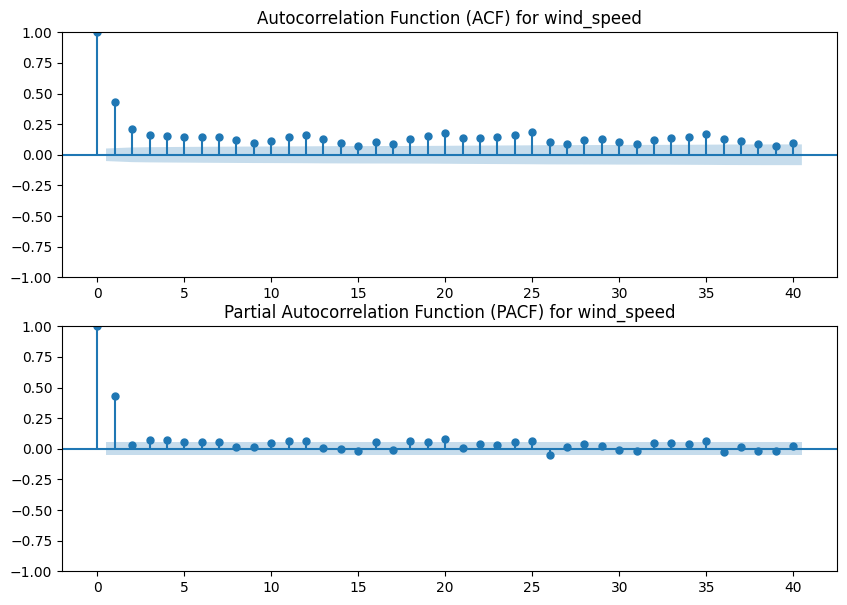

In [882]:
pacf('wind_speed')

- ACF: Autocorrelation starts off high (lag 1) after which the autocorrelation drops quickly and hovers near zero. Suggests short term dependence. Today's wind speed is correlated with yesterday's wind speed but the influence fades rapidly for longer lags
- PACF: Prominent spike at lag 1; AR(1) type process

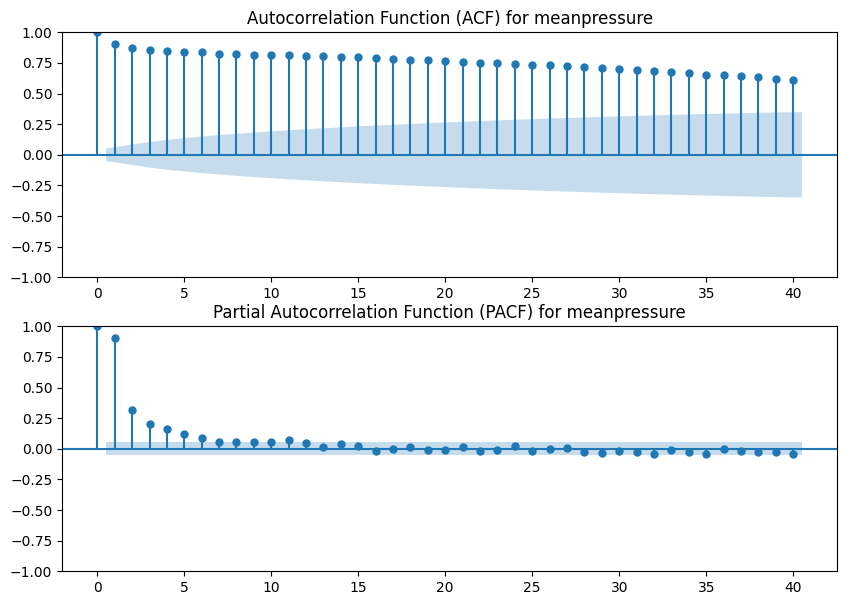

In [883]:
pacf('meanpressure')

- ACF: Autocorrelation remains strongly positive over many lags and decays gradually, indicating a long memory or non-stationary process
- PACF: Prominent spike at lag 1; suggesting that the most immediate past value of meanpressure is highly influential.

# 4. Frequency Domain Decomposition

In [884]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

def fdd(column: str):
    data = df_train[column].values
    N = len(data)  # Number of data points
    dt = 1.0       # Time step, e.g., 1 day between observations

    # Remove the mean to focus on oscillations around zero
    data_detrended = data - np.mean(data)

    # Compute the FFT
    yf = np.fft.fft(data_detrended)

    # Compute corresponding frequencies
    xf = np.fft.fftfreq(N, d=dt)

    # Keep only the positive frequencies (the spectrum is symmetric)
    mask = xf >= 0
    xf = xf[mask]
    yf = yf[mask]
    
    plt.figure(figsize=(8, 4))
    plt.plot(xf, np.abs(yf))
    plt.title(f'FFT of the Time Series for {column}')
    plt.xlabel('Frequency (cycles per day)' if dt==1 else 'Frequency')
    plt.ylabel('Amplitude')
    plt.show()
    
    frequencies, psd = periodogram(data_detrended, fs=1.0/dt)
    plt.figure(figsize=(8,4))
    plt.semilogy(frequencies, psd)  # semilog-y is common to visualize wide PSD ranges
    plt.title(f'Periodogram for {column}')
    plt.xlabel('Frequency (cycles per day)' if dt==1 else 'Frequency')
    plt.ylabel('Power Spectral Density')
    plt.show()


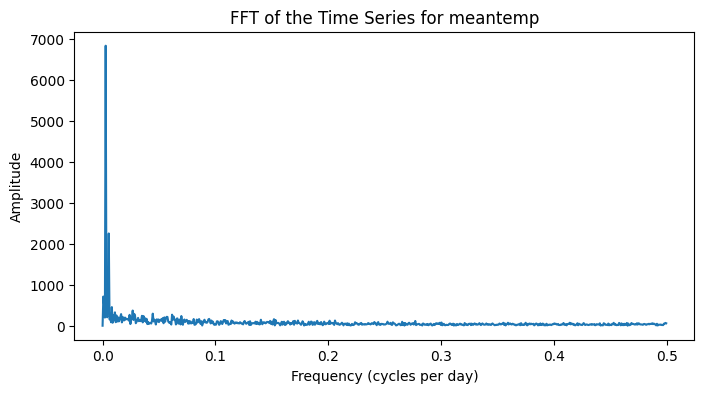

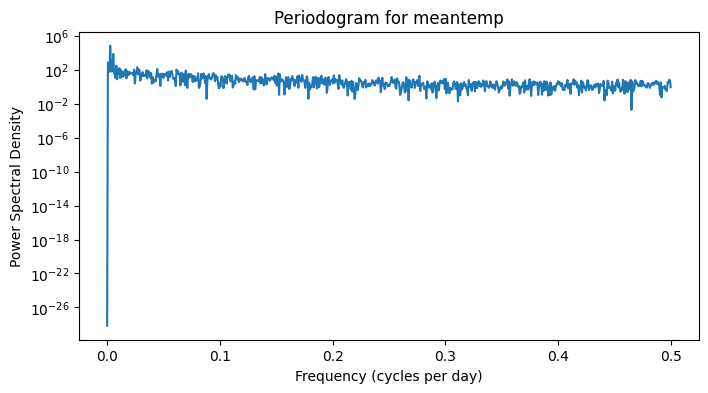

In [885]:
fdd('meantemp')

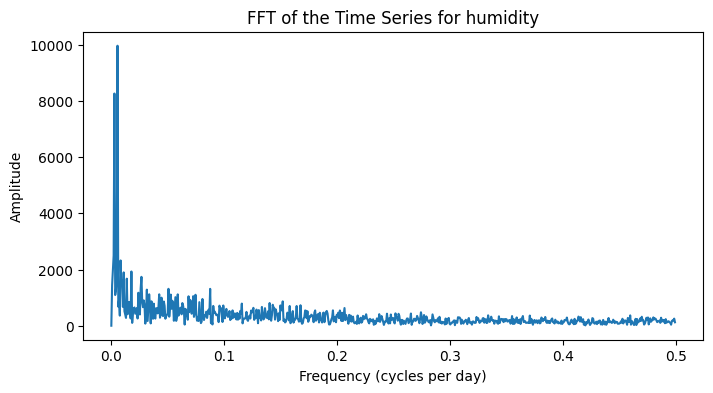

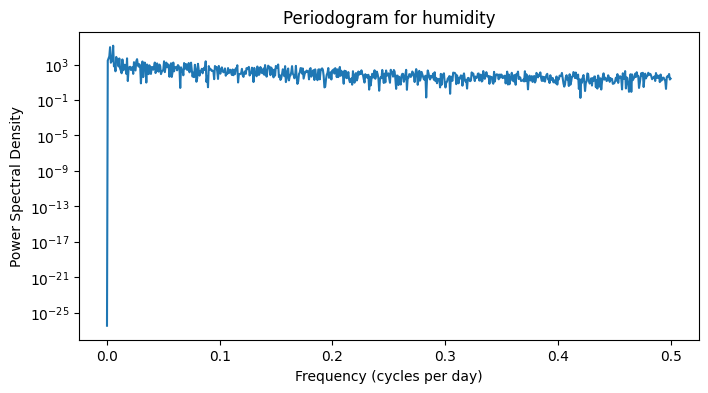

In [886]:
fdd('humidity')

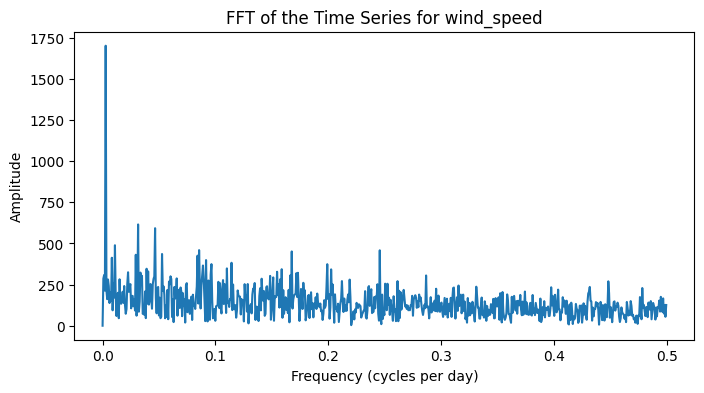

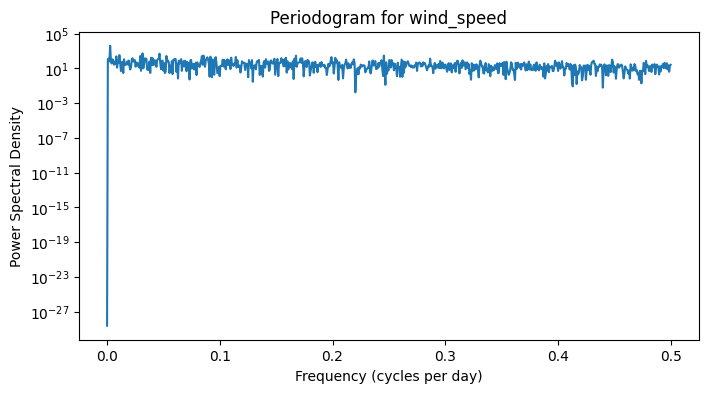

In [887]:
fdd('wind_speed')

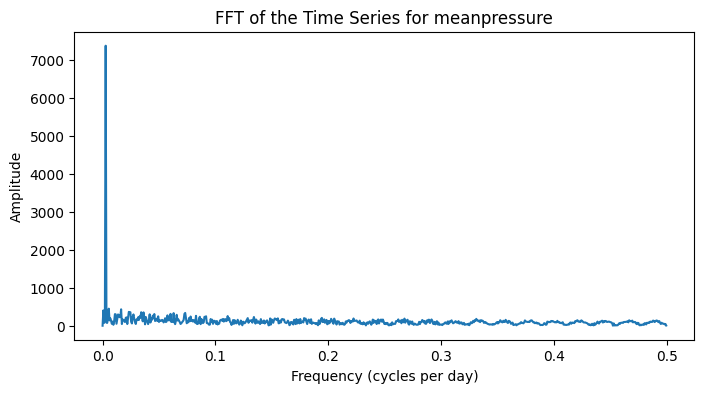

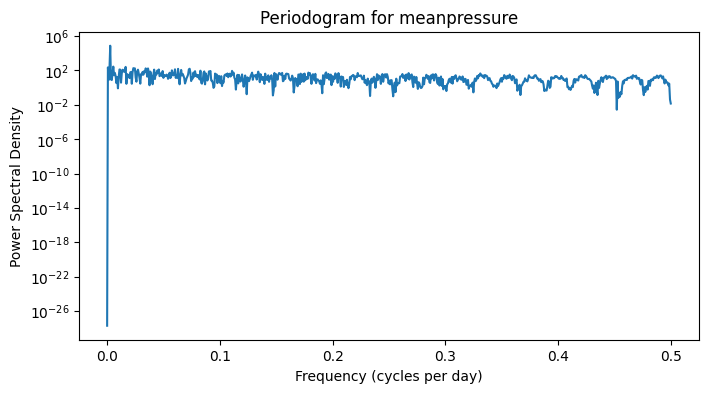

In [888]:
fdd('meanpressure')

# 5. Time Series Forecasting